In [3]:
import numpy as np
import simpy as sp

In [4]:

# Crear una matriz de ceros
matrix_zeros = np.zeros((3, 3))  # Matriz 3x3 de ceros
print("Matriz de ceros:")
print(matrix_zeros)

# Crear una matriz de unos
matrix_ones = np.ones((3, 3))  # Matriz 3x3 de unos
print("\nMatriz de unos:")
print(matrix_ones)

# Crear una matriz identidad
identity_matrix = np.eye(3)  # Matriz identidad 3x3
print("\nMatriz identidad:")
print(identity_matrix)

# Crear una matriz con valores específicos
specific_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\nMatriz específica:")
print(specific_matrix)


Matriz de ceros:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Matriz de unos:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Matriz identidad:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matriz específica:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


<h1> SUMA Y RESTA DE MATRICES </h1>

In [5]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

# Suma
matrix_sum = matrix_a + matrix_b
print("\nSuma de matrices:")
print(matrix_sum)

# Resta
matrix_diff = matrix_a - matrix_b
print("\nResta de matrices:")
print(matrix_diff)



Suma de matrices:
[[ 6  8]
 [10 12]]

Resta de matrices:
[[-4 -4]
 [-4 -4]]


<h1> MULTIPLICACIÓN DE MATRICES</h1>


In [10]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

# Multiplicación de matrices
matrix_product = matrix_a @ matrix_b
# matrix_product = np.dot(matrix_a,matrix_b)
print("\nMultiplicación de matrices:")
print(matrix_product)



Multiplicación de matrices:
[[19 22]
 [43 50]]


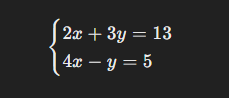


<strong>EL OBJETIVO ES ENCONTRAR LOS VALORES DE X & Y <strong>

<code>2.1. Método de Eliminación de Gauss</code>

In [18]:

# Definir la matriz de coeficientes A y el vector de constantes b
A = np.array([[2, 3], [4, -1]], dtype=float)  # Matriz de coeficientes del sistema
b = np.array([13, 5], dtype=float)            # Vector de constantes del sistema

# Formar la matriz aumentada que combina A y b en una sola matriz
augmented_matrix = np.hstack((A, b.reshape(-1, 1)))
# np.hstack() concatena matrices en la dirección horizontal
# b.reshape(-1, 1) convierte b en una columna para concatenarla con A

# Método de Eliminación de Gauss
def gauss_elimination(matrix):
    A = matrix[:, :-1]  # Extraer la parte de la matriz de coeficientes
    b = matrix[:, -1]   # Extraer el vector de constantes
    n = len(b)          # Número de ecuaciones (o tamaño de la matriz)

    # Proceso de eliminación hacia adelante
    for i in range(n):
        # Buscar el pivote máximo en la columna actual para evitar problemas de precisión numérica
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        # np.abs() devuelve el valor absoluto
        # np.argmax() devuelve el índice del valor máximo
        # Añadimos i para obtener el índice correcto en la matriz completa
        if i != max_row:
            # Intercambiar la fila actual con la fila que contiene el pivote máximo
            A[[i, max_row], :] = A[[max_row, i], :]
            b[[i, max_row]] = b[[max_row, i]]

        # Hacer ceros debajo del pivote actual
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]  # Calcular el factor para hacer ceros debajo del pivote
            # np.dot() no se usa aquí porque trabajamos con operaciones de matriz elemento a elemento
            A[j, i:] -= factor * A[i, i:]  # Actualizar las filas de la matriz de coeficientes
            b[j] -= factor * b[i]          # Actualizar el vector de constantes

    # Sustitución hacia atrás para resolver el sistema
    x = np.zeros(n)  # Inicializar el vector de soluciones con ceros
    for i in reversed(range(n)):
        # Resolver para x[i] usando la sustitución hacia atrás
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
        # np.dot() se usa aquí para calcular el producto punto de los elementos ya resueltos

    return x

# Aplicar el método de eliminación de Gauss y obtener la solución
solution = gauss_elimination(augmented_matrix)
print("\nSolución del sistema de ecuaciones (Método de Gauss):")
print(f"x = {solution[0]}")
print(f"y = {solution[1]}")



Solución del sistema de ecuaciones (Método de Gauss):
x = 2.0
y = 3.0


<code>2.2. Método de Eliminación de Gauss-Jordan </code>

In [16]:
import numpy as np

# Definir la matriz de coeficientes y el vector de constantes
A = np.array([[2, 3], [4, -1]], dtype=float)
b = np.array([13, 5], dtype=float)

# Formar la matriz aumentada
augmented_matrix = np.hstack((A, b.reshape(-1, 1)))

# Método de Gauss-Jordan
def gauss_jordan(matrix):
    A = matrix[:, :-1]
    b = matrix[:, -1]
    n = len(b)
    
    for i in range(n):
        # Buscar el pivote (máximo valor absoluto en la columna i)
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        if i != max_row:
            # Intercambiar filas
            A[[i, max_row], :] = A[[max_row, i], :]
            b[[i, max_row]] = b[[max_row, i]]
        
        # Hacer pivote 1
        pivot = A[i, i]
        A[i, :] /= pivot
        b[i] /= pivot
        
        # Hacer ceros en la columna del pivote
        for j in range(n):
            if i != j:
                factor = A[j, i]
                A[j, :] -= factor * A[i, :]
                b[j] -= factor * b[i]
    
    return b

solution = gauss_jordan(augmented_matrix)
print("\nSolución del sistema de ecuaciones (Método de Gauss-Jordan):")
print(f"x = {solution[0]}")
print(f"y = {solution[1]}")



Solución del sistema de ecuaciones (Método de Gauss-Jordan):
x = 2.0
y = 3.0


<h1><code> USANDO NUMPY PARA SOLUCIONAR MÁS FACIL EL PROBLEMA </code></h1>

In [15]:
import numpy as np

# Definir la matriz de coeficientes y el vector de constantes
A = np.array([[2, 3], [4, -1]])
b = np.array([13, 5])

# Resolver el sistema de ecuaciones
solution = np.linalg.solve(A, b)
print("\nSolución del sistema de ecuaciones (Método NumPy):")
print(f"x = {solution[0]}")
print(f"y = {solution[1]}")



Solución del sistema de ecuaciones (Método NumPy):
x = 2.0
y = 3.0


<code>Imaginemos una fábrica con varias máquinas, y queremos simular el proceso en el que cada máquina trabaja y luego se detiene por mantenimiento. Vamos a suponer que tenemos dos máquinas, y cada una trabaja durante un tiempo específico y luego está parada durante otro tiempo específico. </code>

In [41]:
import sympy as sp

# Definir variables simbólicas
x, y = sp.symbols('x y')

# Definir ecuaciones
eq1 = sp.Eq(2*x + y, 13)
eq2 = sp.Eq(4*x - y, 5)
# Imprimir las ecuaciones de manera bonita en la consola
print("Ecuaciones:")
sp.pprint(eq1)
sp.pprint(eq2)

# Resolver el sistema de ecuaciones
solution = sp.solve((eq1, eq2), (x, y))
print(f"x = {solution[x]}")
print(f"y = {solution[y]}")


Ecuaciones:
2⋅x + y = 13
4⋅x - y = 5
x = 3
y = 7


In [37]:
import simpy

def machine(env, name, work_time, downtime):
    """Función que simula una máquina en la fábrica."""
    while True:
        # La máquina comienza a trabajar
        print(f'{name} starts working at {env.now}')
        yield env.timeout(work_time)  # Simula el tiempo de trabajo
        print(f'{name} stops working at {env.now}')
        
        # La máquina está en mantenimiento
        yield env.timeout(downtime)  # Simula el tiempo de inactividad

def setup(env):
    """Función para configurar el entorno y las máquinas."""
    # Crear dos máquinas con diferentes tiempos de trabajo y de inactividad
    env.process(machine(env, 'Machine 1', work_time=5, downtime=2))
    env.process(machine(env, 'Machine 2', work_time=7, downtime=3))

# Crear el entorno de simulación
env = simpy.Environment()

# Configurar el entorno con las máquinas
setup(env)  # Llama a setup, no es necesario env.process(setup(env))

# Ejecutar la simulación durante un tiempo específico
env.run(until=30)  # Ejecuta la simulación hasta el tiempo 30


Machine 1 starts working at 0
Machine 2 starts working at 0
Machine 1 stops working at 5
Machine 2 stops working at 7
Machine 1 starts working at 7
Machine 2 starts working at 10
Machine 1 stops working at 12
Machine 1 starts working at 14
Machine 2 stops working at 17
Machine 1 stops working at 19
Machine 2 starts working at 20
Machine 1 starts working at 21
Machine 1 stops working at 26
Machine 2 stops working at 27
Machine 1 starts working at 28
